<a href="https://colab.research.google.com/github/uttam4027/Analysis-of-Unicorn-Companies/blob/main/Analysis_of_Unicorn_Companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Load and Prepare the Data:**

In [ ]:
import pandas as pd

# Load your dataset (replace 'data.csv' with your file name)
df = pd.read_csv('/content/Unicorn_Companies.csv')




In [ ]:
df['City'].unique

<bound method Series.unique of 0             Beijing
1           Hawthorne
2            Shenzhen
3       San Francisco
4           Stockholm
            ...      
1057         Shanghai
1058          Beijing
1059        Chongqing
1060           London
1061       Long Beach
Name: City, Length: 1062, dtype: object>

In [ ]:
print(df.columns)


Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')


# **1. Which unicorn companies have had the biggest return on investment?**




**1.1  Calculate ROI:**




In [ ]:


# Calculate ROI
df['ROI'] = (df['Valuation'] - df['Funding']) / df['Funding']

# Sort DataFrame by ROI in descending order
top_roi_companies = df.sort_values(by='ROI', ascending=False)

# Display top companies with highest ROI
print(top_roi_companies[['Company','Industry', 'ROI']].head(10))  # Display top 10 companies

                  Company                         Industry          ROI
189  Otto Bock HealthCare                           Health          inf
238                Zapier     Internet software & services  3999.000000
61                 Dunamu                          Fintech   125.760563
785             Workhuman     Internet software & services   110.111111
360                  CFGI                          Fintech   104.263158
736                Manner                            Other    99.000000
72        DJI Innovations                         Hardware    75.190476
753           GalaxySpace      Mobile & telecommunications    70.428571
5                   Canva     Internet software & services    68.930070
367            Il Makiage  E-commerce & direct-to-consumer    67.965517


**1.2 Visualize Data**

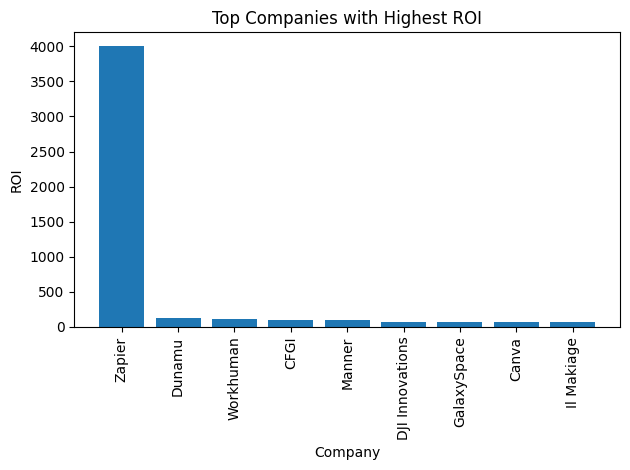

In [ ]:
import matplotlib.pyplot as plt

# Plot top companies with highest ROI
top_roi_companies_plot = top_roi_companies.head(10)
plt.bar(top_roi_companies_plot['Company'], top_roi_companies_plot['ROI'])
plt.xlabel('Company')
plt.ylabel('ROI')
plt.title('Top Companies with Highest ROI')
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
# Calculate time to reach $1B valuation
df['Time to Reach $1B'] = pd.to_datetime(df['Date Joined']) - pd.to_datetime(df['Year Founded'], format='%Y')
df['Time to Reach $1B'] = df['Time to Reach $1B'].dt.days / 365  # Convert days to years

<ipython-input-3-a2135e4b298a>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Time to Reach $1B'] = pd.to_datetime(df['Date Joined']) - pd.to_datetime(df['Year Founded'], format='%Y')


In [ ]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Time to Unicorn (Years),ROI,Time to Reach $1B
0,Bytedance,180000000000,2017-07-04,Artificial intelligence,Beijing,China,Asia,2012,8000000000,"Sequoia Capital China, SIG Asia Investments, S...",5,21.500000,5.509589
1,SpaceX,100000000000,2012-01-12,Other,Hawthorne,United States,North America,2002,7000000000,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,13.285714,10.035616
2,SHEIN,100000000000,2018-03-07,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2000000000,"Tiger Global Management, Sequoia Capital China...",10,49.000000,10.186301
3,Stripe,95000000000,2014-01-23,Fintech,San Francisco,United States,North America,2010,2000000000,"Khosla Ventures, LowercaseCapital, capitalG",4,46.500000,4.063014
4,Klarna,46000000000,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4000000000,"Institutional Venture Partners, Sequoia Capita...",6,10.500000,6.947945


In [ ]:
# Calculate overall average duration
average_duration = df['Time to Reach $1B'].mean()

# Calculate average durations for different periods (e.g., by decade)
# For example, calculate the average duration for companies founded between 2011-2022
average_duration_2000s = df[(df['Year Founded'] >= 2011) & (df['Year Founded'] < 2022)]['Time to Reach $1B'].mean()


In [ ]:
# Calculate average time to reach $1 billion valuation
average_time = df['Time to Reach $1B'].mean()
print(f"Average time to reach $1B valuation: {average_time:.2f} years")


Average time to reach $1B valuation: 7.49 years


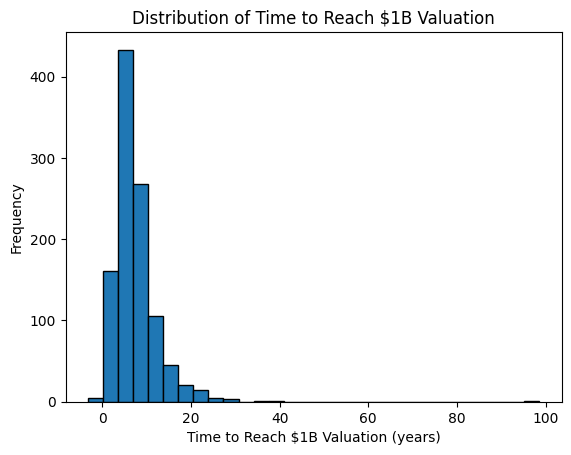

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram or distribution of time to reach $1B valuation
plt.hist(df['Time to Reach $1B'], bins=30, edgecolor='black')
plt.xlabel('Time to Reach $1B Valuation (years)')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Reach $1B Valuation')
plt.show()


# 2.**Which countries have the most unicorns? Are there any cities that appear to be industry hubs?**




In [ ]:
# Count unicorn companies by country
unicorns_by_country = df['Country'].value_counts()
print(unicorns_by_country)


United States           555
China                   170
India                    65
United Kingdom           43
Germany                  26
France                   23
Israel                   20
Canada                   18
Brazil                   16
Singapore                12
South Korea              12
Australia                 8
Hong Kong                 6
Mexico                    6
Indonesia                 6
Netherlands               6
Sweden                    6
Switzerland               5
Japan                     5
Ireland                   5
Finland                   4
Norway                    4
United Arab Emirates      3
Turkey                    3
Spain                     3
Belgium                   3
Chile                     2
South Africa              2
Philippines               2
Thailand                  2
Estonia                   2
Vietnam                   2
Austria                   2
Colombia                  2
Denmark                   2
Argentina           

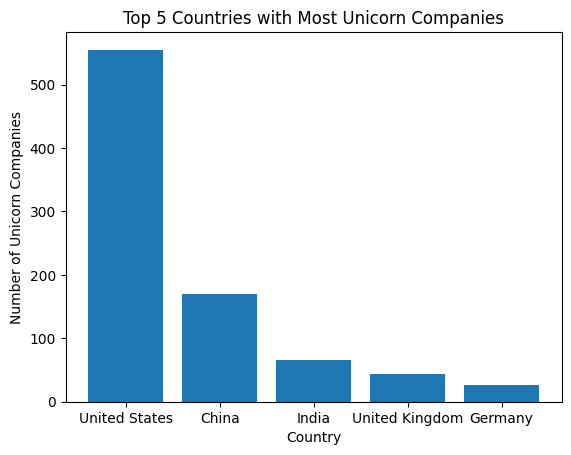

In [ ]:
import matplotlib.pyplot as plt

# Count unicorn companies by country
unicorns_by_country = df['Country'].value_counts()

# Select top 5 countries
top_countries = unicorns_by_country.head(5)

# Plot bar chart
plt.bar(top_countries.index, top_countries)
plt.xlabel('Country')
plt.ylabel('Number of Unicorn Companies')
plt.title('Top 5 Countries with Most Unicorn Companies')
plt.show()


In [ ]:
# Count unicorn companies by city
unicorns_by_city = df['City'].value_counts()
print(unicorns_by_city)


San Francisco    152
New York         102
Beijing           62
Shanghai          43
London            34
                ... 
Lysaker            1
Richmond           1
Santa Barbara      1
Altrincham         1
Milpitas           1
Name: City, Length: 253, dtype: int64


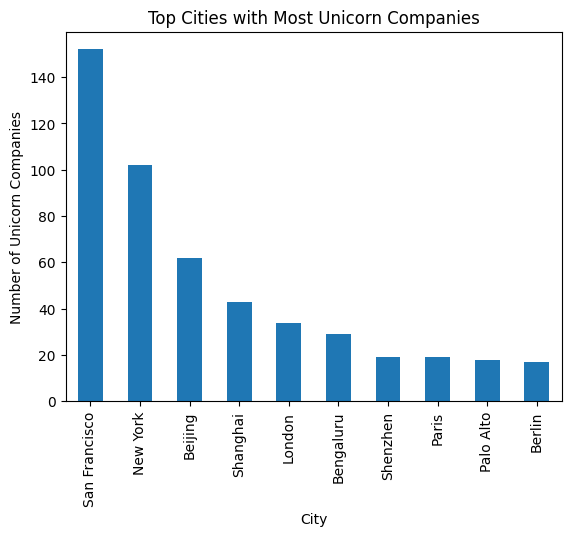

In [ ]:
# Plot top cities with the most unicorn companies
top_cities = unicorns_by_city.head(10)
top_cities.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Unicorn Companies')
plt.title('Top Cities with Most Unicorn Companies')
plt.show()

***Unveiling the Top 10 Industries: A Deep Dive into Unicorn Companies***

In [ ]:


# Count unicorn companies by industry
unicorns_by_industry = df['Industry'].value_counts()

# Select top 10 industries
top_industries = unicorns_by_industry.head(10)

# Display the top 10 industries and their respective counts
print("Top 10 Industries with the Maximum Number of Unicorn Companies:")
print(top_industries)





Top 10 Industries with the Maximum Number of Unicorn Companies:
Fintech                                222
Internet software & services           203
E-commerce & direct-to-consumer        109
Health                                  74
Artificial intelligence                 73
Other                                   56
Supply chain, logistics, & delivery     56
Cybersecurity                           50
Data management & analytics             40
Mobile & telecommunications             37
Name: Industry, dtype: int64


In [ ]:

unicorns_by_industry = df['Industry'].value_counts()

# Select top 10 industries
top_industries = unicorns_by_industry.head(10)

# Display the top 10 industries and their respective counts
print("Top 10 Industries with the Maximum Number of Unicorn Companies:")
print(top_industries)

# Check if there are any cities that appear to be industry hubs
for industry in top_industries.index:
    # Filter data for the specific industry
    industry_data = df[df['Industry'] == industry]

    # Count unicorn companies by city within the industry
    unicorns_by_city = industry_data['City'].value_counts()

    # Display the cities with the respective counts
    print(f"\nCities in {industry} Industry:")
    print(unicorns_by_city)


Top 10 Industries with the Maximum Number of Unicorn Companies:
Fintech                                222
Internet software & services           203
E-commerce & direct-to-consumer        109
Health                                  74
Artificial intelligence                 73
Other                                   56
Supply chain, logistics, & delivery     56
Cybersecurity                           50
Data management & analytics             40
Mobile & telecommunications             37
Name: Industry, dtype: int64

Cities in Fintech Industry:
San Francisco       41
New York            33
London              24
Bengaluru            6
Los Angeles          5
                    ..
Atlanta              1
Ho Chi Minh City     1
Irvine               1
Bangalore            1
Charlotte            1
Name: City, Length: 80, dtype: int64

Cities in Internet software & services Industry:
San Francisco       54
New York            19
Bengaluru            9
Beijing              5
Chicago         

# 3.**Which investors have funded the most unicorns?**


In [ ]:
# Split and count investors
investors_count = df['Select Investors'].str.split(', ').explode().value_counts()
print(investors_count)


Accel                       60
Andreessen Horowitz         53
Tiger Global Management     53
Sequoia Capital China       47
Insight Partners            46
                            ..
Go-Ventures                  1
Lockheed Martin Ventures     1
GAM Holding                  1
HOF Capital                  1
Causeway Media Partners      1
Name: Select Investors, Length: 1250, dtype: int64


In [ ]:
# Display top investors
top_investors = investors_count.head(10)
print(top_investors)


Accel                          60
Andreessen Horowitz            53
Tiger Global Management        53
Sequoia Capital China          47
Insight Partners               46
Sequoia Capital                46
Lightspeed Venture Partners    34
SoftBank Group                 34
General Catalyst               33
Index Ventures                 32
Name: Select Investors, dtype: int64


# 4.**How long does it usually take for a company to become a unicorn? Has it always been this way?**

Average time to become a unicorn: 6.989642184557439
Median time to become a unicorn: 6.0


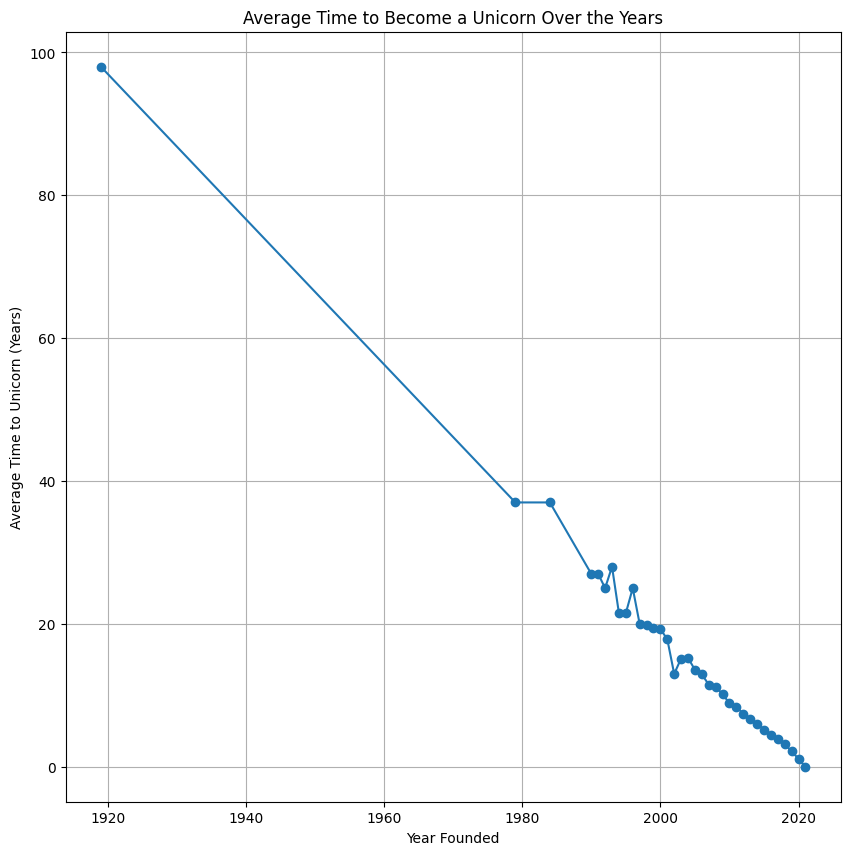

In [ ]:
# Calculate the time it takes for a company to become a unicorn
# This is the difference between the 'Date Joined' and 'Year Founded'

# Convert 'Date Joined' to datetime
# Ensure 'Year Founded' is an integer
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df['Year Founded'] = df['Year Founded'].astype(int)

# Calculate the time to become a unicorn in years
# We will ignore companies with missing 'Year Founded' data
df['Time to Unicorn (Years)'] = df['Date Joined'].dt.year - df['Year Founded']

# Calculate the average time to become a unicorn
average_time_to_unicorn = df['Time to Unicorn (Years)'].mean()

# Calculate the median time to become a unicorn
median_time_to_unicorn = df['Time to Unicorn (Years)'].median()

# Calculate the trend over the years
# Group by 'Year Founded' and calculate the average time for each group
trend_over_years = df.groupby('Year Founded')['Time to Unicorn (Years)'].mean().reset_index()

# Output the average and median time to become a unicorn
print('Average time to become a unicorn:', average_time_to_unicorn)
print('Median time to become a unicorn:', median_time_to_unicorn)

# Plot the trend over the years
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(trend_over_years['Year Founded'], trend_over_years['Time to Unicorn (Years)'], marker='o')
plt.title('Average Time to Become a Unicorn Over the Years')
plt.xlabel('Year Founded')
plt.ylabel('Average Time to Unicorn (Years)')
plt.grid(True)
plt.show()

In [ ]:
# Sort DataFrame by the time to reach $1 billion in ascending order
top_fastest_unicorns = df.sort_values(by='Time to Reach $1B').head(10)

# Display the top 10 companies, their industry, and time taken
print("Top 10 Companies Becoming Unicorns in the Shortest Time:")
print(top_fastest_unicorns[['Company', 'Industry', 'Country', 'Time to Reach $1B']])

Top 10 Companies Becoming Unicorns in the Shortest Time:
                   Company                         Industry        Country  \
709           Yidian Zixun      Mobile & telecommunications          China   
313             Flink Food  E-commerce & direct-to-consumer        Germany   
161  Ola Electric Mobility            Auto & transportation          India   
768                   Jokr  E-commerce & direct-to-consumer  United States   
990                 Playco                            Other          Japan   
395              candy.com                          Fintech  United States   
552             ClickHouse      Data management & analytics  United States   
956           Mensa Brands                            Other          India   
544                  Avant          Artificial intelligence  United States   
815             GlobalBees  E-commerce & direct-to-consumer          India   

     Time to Reach $1B  
709          -3.210959  
313           0.030137  
161      